# Machine Learning - Unsupervised Learning

## Domain:
○ E-commerce


## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Business Context:
- Customer segmentation is one of the most important marketing tools at your
disposal, because it can help a business to better understand its target audience.
This is because it groups customers based on common characteristics.
- Segmentation can be based on the customer’s habits and lifestyle, in
particular, their buying habits. Different age groups, for example, tend to
spend their money in different ways, so brands need to be aware of who
exactly is buying their product.
- Segmentation also focuses more on the personality of the consumer,
including their opinions, interests, reviews, and rating. Breaking down a
large customer base into more manageable clusters, making it easier to
identify your target audience and launch campaigns and promote the
business to the most relevant people

### Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements (etc.)

### Data Citation:
- Rishabh Misra, Mengting Wan, Julian McAuley "Decomposing Fit Semantics
for Product Size Recommendation in Metric Spaces". RecSys, 2018.
- Rishabh Misra, Jigyasa Grover "Sculpting Data for ML: The first act of
Machine Learning". 2021.

### Project Objective:
Based on the given users and items data of an e-commerce company, segment
the similar user and items into suitable clusters. Analyze the clusters and provide
your insights to help the organization promote their business.

### Attribute Information:
- user_id: A unique id for the customer
- item_id: Unique product id
- rented for: Purpose clothing was rented for
- body type: Body type of customer
- review_text: Review given by the customer
- size : The standardized size of the product
- rating: Rating for the product
- age :age of the customer
- category: The category of the product
- bust: Size bust measurement of customer
- height: Height of the customer
- review_date: Date when the review was written
- fit : Fit feedback

### 1. Import the required libraries and load the data: [ Score: 3 point ]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

### 2. Load the CSV file (i.e renttherunway.csv) and Check the first few samples, shape, info of the data and try to familiarize yourself with different features (2)

In [72]:
data = pd.read_csv(r'renttherunway.csv')
data.head(3)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"


### Data cleansing and Exploratory data analysis: [ Score: 20 point ]

#### 3. Check if there are any duplicate records in the dataset? If any, drop them.(1)

In [60]:
data[data.duplicated]

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


There are no duplicate records

#### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) (1)

In [73]:
data.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [74]:
drop_col = ['Unnamed: 0','user_id','item_id','review_text','review_summary']
data.drop(columns=data[drop_col],axis=1,inplace=True)

Redundant columns have been removed.

#### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)

In [75]:
data['weight']=data['weight'].str.replace("lbs","").astype(float)

In [76]:
data['weight'].head(3)

0    137.0
1    132.0
2      NaN
Name: weight, dtype: float64

Weight converted from string to float.

#### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. (2)

In [77]:
# Find the unique values in column "rented for"
data['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [78]:
#Check for sum of missing values in this column
data['rented for'].isnull().sum()

10

In [79]:
# Display all the missing values in the column
df_missing = pd.DataFrame({'value':data['rented for'],'missing':data['rented for'].isnull()})
df_missing[df_missing['missing']==True]

,value,missing
7391,NaN,True
17609,NaN,True
26600,NaN,True
55393,NaN,True
65074,NaN,True
71397,NaN,True
76804,NaN,True
86065,NaN,True
148559,NaN,True
176050,NaN,True


In [80]:
# Find the most frequent value in the columns
mode = data['rented for'].mode()[0]
# Replace the mode value with the missing values in the column
data['rented for'].fillna(mode,inplace=True)

In [81]:
data['rented for']=data['rented for'].replace('party: cocktail','party')
data['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work'], dtype=object)

#### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. (3)

In [82]:
# Function to convert feet to inches
def feet_to_inches(height):
    if pd.isna(height):
     return np.nan
    else:
     feet, inches = height.split("'")
     return float(feet)*12 + float(inches.replace('"', ''))


In [83]:
data['height']=data['height'].apply(feet_to_inches)
data['height'].head()

0    68.0
1    66.0
2    64.0
3    65.0
4    69.0
Name: height, dtype: float64

#### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)

In [84]:
#Sum of all the null values in the columns
data.isnull().sum()

fit                0
bust size      18411
weight         29982
rating            82
rented for         0
body type      14637
category           0
height           677
size               0
age              960
review_date        0
dtype: int64

In [85]:
# More sound method to replace values:
def deal_miss_val(df):
 for i in df.columns:
    if df[i].dtype == np.number:
        df[i].fillna(df[i].mean(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True) 

In [105]:
#Placing the dataframe in clean_df
clean_df = data.copy()
deal_miss_val(clean_df)

In [106]:
clean_df.isnull().sum()

fit            0
bust size      0
weight         0
rating         0
rented for     0
body type      0
category       0
height         0
size           0
age            0
review_date    0
dtype: int64

#### 9. Check the statistical summary for the numerical and categorical columns and write your findings. (3)

In [107]:
#Statistical summary
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,192544.0,137.391709,20.122771,50.0,125.0,137.391709,145.0,300.0
rating,192544.0,9.092371,1.429740,2.0,8.0,10.000000,10.0,10.0
height,192544.0,65.310621,2.658793,54.0,63.0,65.000000,67.0,78.0
size,192544.0,12.245175,8.494877,0.0,8.0,12.000000,16.0,58.0
age,192544.0,33.871017,8.037969,0.0,29.0,32.000000,37.0,117.0


In [108]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fit          192544 non-null  object 
 1   bust size    192544 non-null  object 
 2   weight       192544 non-null  float64
 3   rating       192544 non-null  float64
 4   rented for   192544 non-null  object 
 5   body type    192544 non-null  object 
 6   category     192544 non-null  object 
 7   height       192544 non-null  float64
 8   size         192544 non-null  int64  
 9   age          192544 non-null  float64
 10  review_date  192544 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 16.2+ MB


In [109]:
# Categorical data statistics
clean_df.select_dtypes('O').describe()

,fit,bust size,rented for,body type,category,review_date
count,192544,192544,192544,192544,192544,192544
unique,3,106,8,7,68,2274
top,fit,34b,wedding,hourglass,dress,"June 15, 2016"
freq,142058,45696,57794,69986,92884,844


. From the above statistics of categorical data we can make sure dress are frequently rented for  Wedding and most are fit for the renter.  
.Also, in rating the mean is 9 out of 10.

#### 10. Are there outliers present in the column age? If yes, treat them with the appropriate      method. (3)

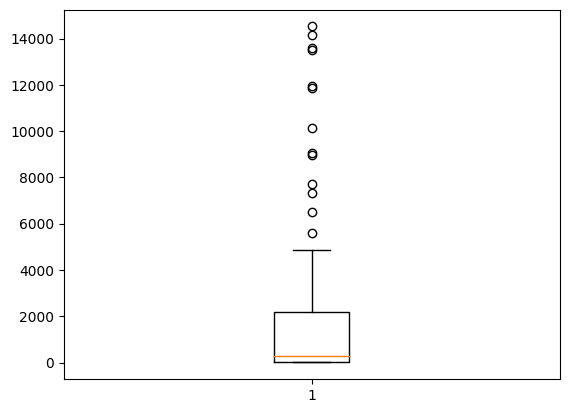

In [110]:
plt.boxplot(clean_df['age'].value_counts())
plt.show()

In [111]:
Q1 = clean_df['age'].quantile(0.25)
Q3 = clean_df['age'].quantile(0.75)
IQR = Q3-Q1
upper_wisker = (Q3 + (1.5*IQR))
lower_wisker = (Q1 - (1.5*IQR))
clean_df=clean_df[(clean_df['age']<= upper_wisker) & (clean_df['age']>=lower_wisker)]

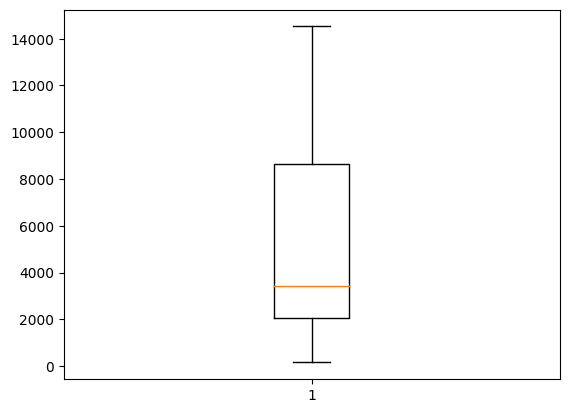

count    191584.000000
mean         33.871017
std           8.058083
min           0.000000
25%          29.000000
50%          32.000000
75%          37.000000
max         117.000000
Name: age, dtype: float64

In [112]:
plt.boxplot(clean_df['age'].value_counts())
plt.show()
data['age'].describe()

#### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. (2)

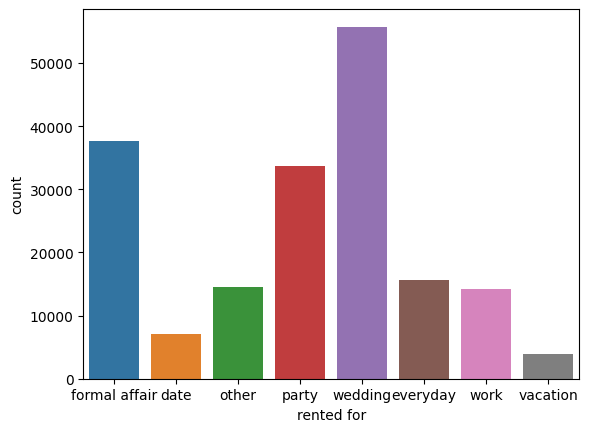

In [113]:
# Ploting the categorical values using count plot
sns.countplot(x='rented for',data=clean_df,order=['formal affair','date', 'other', 'party','wedding','everyday', 'work','vacation'])
plt.show()

Above count plot show that Wedding dress are quite popular.

### Data Preparation for model building: [ Score: 2 point ]
-  12. Encode the categorical variables in the dataset. (1)
-  13. Standardize the data, so that the values are within a particular range. (1)

In [114]:
#convert the review date into a date format
clean_df['review_date']=pd.to_datetime(clean_df['review_date'])
clean_df['review_date']

0        2016-04-20
1        2013-06-18
3        2014-02-12
4        2016-09-26
5        2016-04-30
            ...    
192539   2016-05-18
192540   2016-09-30
192541   2016-03-04
192542   2015-11-25
192543   2017-08-29
Name: review_date, Length: 182290, dtype: datetime64[ns]

In [115]:
clean_df.drop(columns='review_date',axis=1,inplace=True)

In [116]:
clean_df.head(3)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0


In [117]:
#12.Encode categorical data in the dataset
cat_col=clean_df.select_dtypes('O').columns
lb=LabelEncoder()    
for c in cat_col:
    clean_df[c] = clean_df[[c]].apply(lb.fit_transform)

In [118]:
clean_df.head(3)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0


In [119]:
#Standardize and scale the values in every column
std=StandardScaler()
scaled_feature=std.fit_transform(clean_df.values)
scaled_feature_df = pd.DataFrame(scaled_feature,index=clean_df.index,columns=clean_df.columns)

In [120]:
# Remove Height from the set
scaled_feature_df.drop(columns='height',inplace=True,axis=1)

In [121]:

scaled_feature_df.head(3)

,fit,bust size,weight,rating,rented for,body type,category,size,age
0,-0.556727,0.017887,-0.013841,0.636215,0.504898,0.017744,1.577868,0.231460,-0.769380
1,-0.556727,-0.166195,-0.263583,0.636215,-0.466242,1.927128,-0.304830,-0.006696,0.548608
3,-0.556727,-0.074154,-0.113738,-0.764878,-0.951812,0.654205,-0.618613,-0.483007,0.219111


### ● Principal Component Analysis and Clustering: [ Score: 23 point ]

##### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 0-95% of the variance in data is explained by the same. (7)

In [122]:
#Step 1:Calculate Covariance
cov_matrix = np.cov(scaled_feature_df.T)

In [ ]:
#scatter plot the features.
pd.plotting.scatter_matrix(scaled_feature_df, figsize=(10,10))
plt.show()

In [123]:
#Step 2:Calculate Eig Vectors
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors:','\n',eig_vectors)

eigein vals: 
 [2.43181553 0.25788098 0.44181183 1.24652902 0.74965789 1.0709025
 0.89006888 0.96754713 0.94383561]


eigein vectors: 
 [[ 4.37312083e-02  5.46644267e-02 -2.94376811e-02  6.89148172e-01
  -6.88008374e-01  1.67563188e-01 -1.06643812e-02 -1.30824218e-01
  -2.54155715e-02]
 [ 5.26018304e-01  1.39709179e-01 -8.25251558e-01 -5.02494302e-02
   2.20766346e-02 -1.74093855e-02  1.34439761e-01  1.25722425e-02
  -3.46175516e-02]
 [ 5.53250144e-01  6.38695478e-01  4.88074360e-01 -5.80669038e-02
   4.13156391e-02  4.35709344e-02  1.50134048e-01 -1.32323252e-01
  -2.71833470e-02]
 [-4.44110423e-02  5.34014035e-03  1.18559992e-03 -7.04166775e-01
  -7.06344337e-01 -2.18501777e-02  3.19336229e-02 -4.02019522e-02
   1.05443265e-02]
 [ 6.82610034e-03 -5.01830910e-04 -7.69241287e-03 -5.11518662e-02
   3.17965080e-02  6.57528900e-01  1.40092763e-01  2.64057737e-01
   6.88890211e-01]
 [-2.62360755e-01  3.06295411e-02 -2.07426536e-03  4.82839007e-02
   1.29238295e-03 -1.59537413e-02  9.317271

In [126]:
#Step 3: Screen Plot
total= sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cumlt_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cumlt_var_exp)

Explained Variance:  [27.020024370062952, 13.850246420669073, 11.898851407147811, 10.750464739394845, 10.487004812967706, 9.889599981904716, 8.329486364373668, 4.9089934248592595, 2.865328478619972]
Cummulative Variance Explained:  [ 27.02002437  40.87027079  52.7691222   63.51958694  74.00659175
  83.89619173  92.2256781   97.13467152 100.        ]


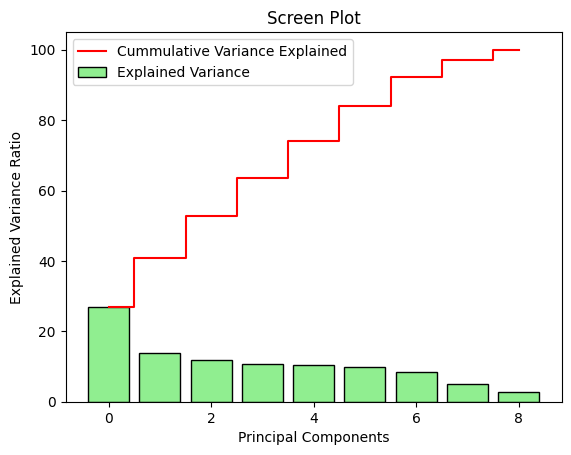

In [128]:
# Scree Plot
plt.bar(range(9),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(9),cumlt_var_exp,where='mid',color='red',label='Cummulative Variance Explained')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Screen Plot')
plt.legend(loc='best')
plt.show()

- From the above screen the first 8 PCA is explaining the 90-95% of the variance. So, we can choose the optimal PC as 8.

### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)
- Find the optimal K Value using elbow plot for K Means clustering.
- Build a Kmeans clustering model using the obtained optimal K value
  from the elbow plot.
- Compute silhouette score for evaluating the quality of the K Means
  clustering technique.

In [130]:
# PCA componet implementation
pca = PCA(n_components=7)
pca_df = pd.DataFrame(pca.fit_transform(clean_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.101827,20.041210,0.369119,-4.711679,2.438426,-2.600291,-1.356924
1,-5.194340,-3.896028,-1.098128,3.577650,1.008663,-0.861541,0.969110
2,-3.415448,-7.907236,0.275791,1.147109,-3.250908,0.173309,2.066757
3,6.292717,-3.916000,5.859594,-5.002611,-0.351947,-3.154695,-2.183672
4,-5.077240,-7.751245,11.918062,14.828576,-1.857631,-2.765968,3.771802


In [154]:
# K-means clustering using PCA transformation data
cluster_error = []
cluster_range = range(2,12)
for i in cluster_range:
    Clusters = KMeans(i,init='k-means++',random_state=1000)
    Clusters.fit(pca_df)
    cluster_error.append(Clusters.inertia_)

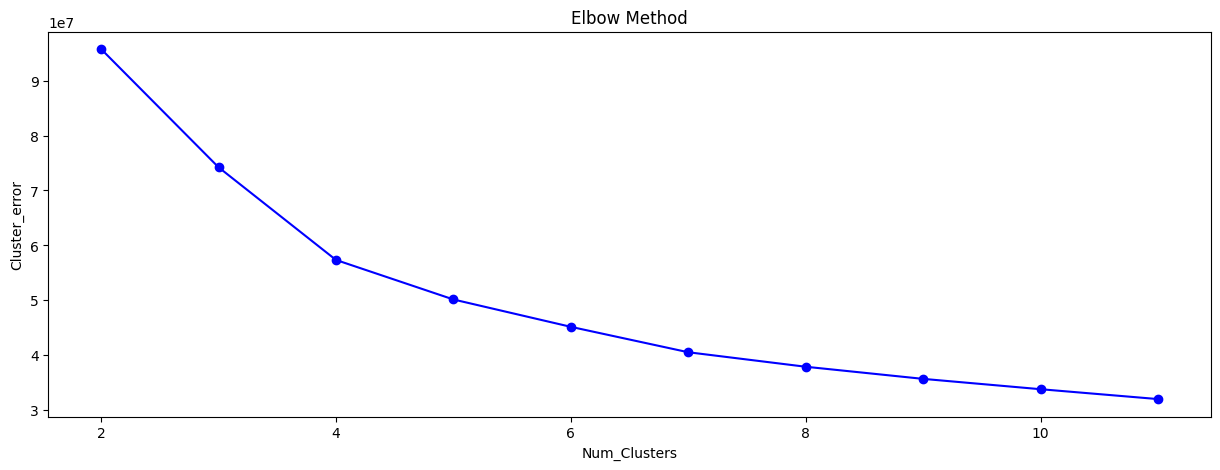

In [155]:
# Creating Dataframe for number of cluster_error and cluster_range
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})

# Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_error'],marker='o',color='b')
plt.title("Elbow Method")
plt.ylabel("Cluster_error")
plt.xlabel("Num_Clusters")
plt.show()

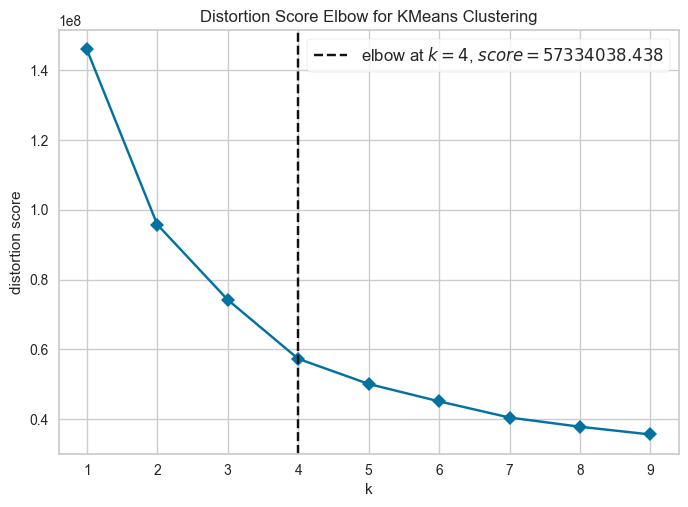

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [158]:
#Making sure the above elbow score was accurate
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visulizer = KElbowVisualizer(model,k=(1,10),timings=False)
visulizer.fit(pca_df)
visulizer.show()

- From the above Elbow plot we can determine K=4, the inertia significantly decrease.

In [159]:
# Applying KMeans clustering for the optimal number of clusters obtained above.
kmean = KMeans(n_clusters=4, random_state=70000)
kmean.fit(pca_df)

KMeans(n_clusters=4, random_state=70000)

In [161]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df,kmean.labels_)
    print("for cluster: {}, Silhouette Score: {} ".format(i,score))

In [43]:
# creating a dataframe of the Labels.
label = pd.DataFrame(kmean.labels_,columns=['Label'])

In [44]:
# Joining the label dataframe to the pca_df dataframe
kmean_df = pca_df.join(label)
kmean_df.head()

,PC1,PC2,PC3,PC4,Label
0,0.101827,20.041210,0.369119,-4.711679,3
1,-5.194340,-3.896028,-1.098128,3.577650,2
2,-3.415448,-7.907236,0.275791,1.147109,2
3,6.292717,-3.916000,5.859594,-5.002611,2
4,-5.077240,-7.751245,11.918062,14.828576,0


In [45]:
kmean_df['Label'].value_counts()

2    72862
0    58852
3    33677
1    16899
Name: Label, dtype: int64

In [113]:
# plt.figure(figsize=(6,4))
# plt.scatter(scaled_feature_df['label'],scaled_feature_df[:1],c=clean_df['age'],cmap='plasma')
# plt.show()

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

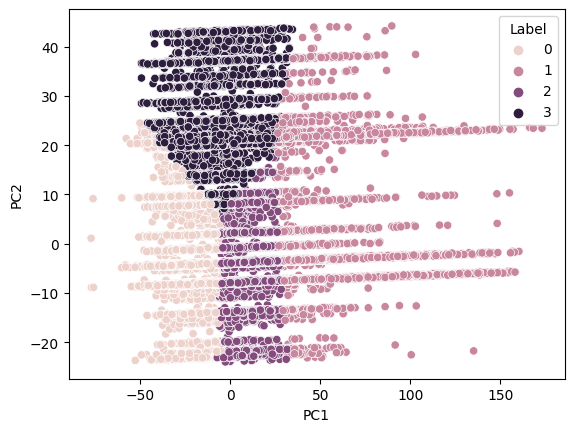

In [46]:
#Visualisation the cluster formed
sns.scatterplot(x=kmean_df['PC1'],y=kmean_df['PC2'],hue='Label',data=kmean_df)


Unable to get the silhouette score as the data set is very large.

### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) (8)
-  Find the optimal K Value using dendrogram for Agglomerative clustering.
-  Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.
-  Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique. (Hint: Take a sample of the dataset for agglomerative
clustering to reduce the computational time)

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

Agglomerative Clustering using orginal data.